<a href="https://colab.research.google.com/github/vaa2114/capstone-project-2019/blob/master/hws/ProbGraphs_hw1_vaa2114.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
Problem Set 1 - Bayesian Networks - Programming Task
(Complete the missing parts)
"""

import numpy as np 
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.io import loadmat
import random

In [0]:
def get_p_z1(z1_val):
    '''
    Computes the prior probability for variable z1 to take value z1_val.
    '''
    return bayes_net['prior_z1'][z1_val]

def get_p_z2(z2_val):
    '''
    Computes the prior probability for variable z2 to take value z2_val.
    '''
    return bayes_net['prior_z2'][z2_val]

def get_p_xk_cond_z1_z2(z1_val, z2_val, k):
    '''
    Computes the conditional likelihood of variable xk assumes value 1
    given z1 assumes value z1_val and z2 assumes value z2_val.
    '''
    return bayes_net['cond_likelihood'][(z1_val, z2_val)][k]

def get_p_joint_z1_z2(z1_val, z2_val):
    return (get_p_z1(z1_val) * get_p_z2(z2_val) * bayes_net['cond_likelihood'][(z1_val, z2_val)][0])

def get_p_joint_x_z1_z2_for_image(z1_val, z2_val, image):

    pos_probs = bayes_net['cond_likelihood'][(z1_val, z2_val)][0] * image
    # print(np.sum(pos_probs))

    neg_image = (1 - image)
    neg_probs = bayes_net['cond_likelihood'][(z1_val, z2_val)][0] * neg_image
    # print(np.sum(neg_probs))
    
    # all_probs = pos_probs + neg_probs
    all_probs = pos_probs
    # print(np.sum(all_probs))

    return (get_p_z1(z1_val) * get_p_z2(z2_val) * all_probs)


In [0]:
def get_p_x_cond_z1_z2(z1_val, z2_val):
    """ 
    Start with the cond likelihood of xk = 1, 
    get the values fo xk = 0
    Calc expectations of each of the xk values
    """
    pos_outcome = 1 * bayes_net['cond_likelihood'][(z1_val, z2_val)][0]
    neg_outcome = 0 * (1- pos_outcome)
    
    E = pos_outcome + neg_outcome
    return E


def get_pixels_sampled_from_p_x_joint_z1_z2():
    '''
    TODO. Note that this function should only return the sampled values of pixel variables.
    '''

    # z1 = random.choice(disc_z1)
    # z2 = random.choice(disc_z2)
    # return (bayes_net['cond_likelihood'][(z1, z2)][0])

    z1 = random.choice(disc_z1)
    z2 = random.choice(disc_z2)

    return get_p_joint_z1_z2(z1, z2)

def get_conditional_expectation(data):
    mean_z1_z2 = np.zeros((data.shape[0], 2))
    z1_z2 = np.ones((data.shape[0], 2))
    marginal_log_likelihood = get_log_p_x(data)
    for i, z1_val in enumerate(disc_z1):
      for j, z2_val in enumerate(disc_z2):
        posterior = get_log_p_x_joint_z1_z2(data, z1_val, z2_val) - marginal_log_likelihood
        mean_z1_z2 += np.expand_dims(np.exp(posterior),1) * ([z1_val, z2_val] * z1_z2)

    return mean_z1_z2[:, 0], mean_z1_z2[:, 1]

def load_model(model_file):
    '''
    Loads a default Bayesian network with latent variables (in this case, a variational autoencoder)
    '''
    
    # Load model from gdrive
    with open(model_file+'.pkl', 'rb') as infile:
        cpts = pkl.load(infile, encoding='bytes')

    model = {}
    model['prior_z1'] = cpts[0]
    model['prior_z2'] = cpts[1]
    model['cond_likelihood'] = cpts[2]

    return model

def load_mat(mat_file):
    # Load mat from gdrive
    with open(mat_file, 'rb') as infile:
        return loadmat(infile)

# from scipy.special import logsumexp
def get_log_p_x(data):

    log_l = np.zeros(len(data))
    # print(log_l.shape)

    # row = data[0]
    # print("first row ", row)

    for i, row in enumerate(data):
        sum = 0
        for _, z1_val in enumerate(disc_z1):
            for _, z2_val in enumerate(disc_z2):
                joint_p = np.prod(get_p_joint_x_z1_z2_for_image(z1_val, z2_val, row))
                sum = sum + joint_p

        print("sum :", sum)

        log_l[i] = np.log(sum)
        print("log i :" , i, log_l)


    return log_l

In [0]:
def q_6d():
    '''
    Plots the pixel variables sampled from the joint distribution as 28 x 28 images.
    Your job is to implement get_pixels_sampled_from_p_x_joint_z1_z2.
    '''
    plt.figure()
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(get_pixels_sampled_from_p_x_joint_z1_z2().reshape(28, 28), cmap='gray')
        plt.title('Sample: ' + str(i+1))
    plt.tight_layout()
    plt.savefig('a_6d', bbox_inches='tight')
    plt.show()
    plt.close()

    return

def q_6e():
    '''
    Plots the expected images for each latent configuration on a 2D grid.
    Your job is to implement get_p_x_cond_z1_z2.
    '''

    canvas = np.empty((28*len(disc_z1), 28*len(disc_z2)))
    print('Canvas Shape ',canvas.shape)

    for i, z1_val in enumerate(disc_z1):
        for j, z2_val in enumerate(disc_z2):
            canvas[(len(disc_z1)-i-1)*28:(len(disc_z2)-i)*28, j*28:(j+1)*28] = \
                get_p_x_cond_z1_z2(z1_val, z2_val).reshape(28, 28)

    plt.figure()
    plt.imshow(canvas, cmap='gray')
    plt.tight_layout()
    plt.savefig('a_6e', bbox_inches='tight')
    plt.show()
    plt.close()

    return

def q_6f():
    '''
    Loads the data and plots the histograms. Rest is TODO.
    Your job is to compute real_marginal_log_likelihood and corrupt_marginal_log_likelihood below.
    '''

    mat = load_mat(drive_path + 'q_6f.mat')
    val_data = mat['val_x']
    test_data = mat['test_x']

    real_marginal_log_likelihood = []
    corrupt_marginal_log_likelihood = []

    '''
    TODO
    '''
    print(val_data[:10].shape)
    log_l = get_log_p_x(val_data[:10])

    # plot_histogram(real_marginal_log_likelihood, title='Histogram of marginal log-likelihood for real data',
    #          xlabel='marginal log-likelihood', savefile='a_6f_hist_real')

    # plot_histogram(corrupt_marginal_log_likelihood, title='Histogram of marginal log-likelihood for corrupted data',
    #     xlabel='marginal log-likelihood', savefile='a_6f_hist_corrupt')

    # plt.show()
    # plt.close()

    return

def q_6g():
    '''
    Loads the data and plots a color coded clustering of the conditional expectations.
    Your job is to implement the get_conditional_expectation function
    '''

    mat = load_mat(drive_path + 'q_6g.mat')
    data = mat['x']
    labels = mat['y']

    mean_z1, mean_z2 = get_conditional_expectation(data)

    plt.figure()
    plt.scatter(mean_z1, mean_z2, c=np.squeeze(labels))
    plt.colorbar()
    plt.grid()
    plt.savefig('a_6g', bbox_inches='tight')
    plt.show()
    plt.close()

    return

Mounting Google Drive for files
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/
Total Cond Likelihood scores: 625
Total p(x_i|z1, z2) per comb of z1,z2:  784


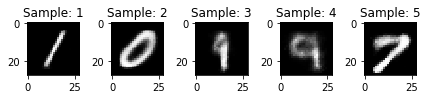

Canvas Shape  (700, 700)


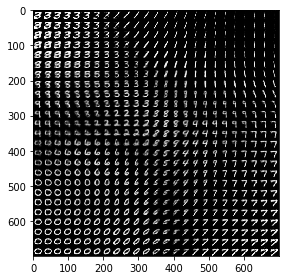

In [6]:
def mount_drive():
    from google.colab import drive
    drive.mount('/content/gdrive/')

def plot_histogram(data, title='histogram', xlabel='value', ylabel='frequency', savefile='hist'):
    '''
    Plots a histogram.
    '''

    plt.figure()
    plt.hist(data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(savefile, bbox_inches='tight')
    return

def main():
    global disc_z1, disc_z2
    n_disc_z = 25
    disc_z1 = np.linspace(-3, 3, n_disc_z)
    disc_z2 = np.linspace(-3, 3, n_disc_z)

    global bayes_net
    global drive_path

    # Mount gdrive
    print("Mounting Google Drive for files")
    mount_drive()
    drive_path = str('/content/gdrive/My Drive/prob-graphs/hw1/')
    bayes_net = load_model(drive_path + 'trained_mnist_model')
    
    print('Total Cond Likelihood scores:', len(bayes_net['cond_likelihood'].keys()))
    print('Total p(x_i|z1, z2) per comb of z1,z2: ', len(bayes_net['cond_likelihood'][(0.5, -2.5)][0]))

    '''
    TODO: Using the above Bayesian Network model, complete the following parts.
    '''
    q_6d()
    q_6e()
    # q_6f()
    # q_6g()

    return

if __name__== '__main__':
    main()